# Lojistik Regresyon İle Finansal Başarısızlık Tahmini


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn.metrics as mt
import warnings
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, roc_curve, accuracy_score, confusion_matrix, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
warnings.filterwarnings('ignore')

veri = pd.read_excel("C:/Users/sarp/OneDrive/Masaüstü/veri.xlsx")
veri.head()

,BaşarıDurumu,KısaVadeliYükümlülüklerToplamKaynaklar,ToplamYabanncıKaynaklarÖzkaynaklar,DuranVarlıklarVarlıkAktifToplamı,ÖzkaynakKarlılığı,DönenVarlıklarDevirHızı,ÖzkaynakDevirHızı,NÇDDH
0,0,0.24,2.60,0.81,0.11,2.65,1.84,-10.61
1,1,0.23,2.94,0.71,0.25,1.81,2.06,8.33
2,1,0.37,2.88,0.71,0.34,2.88,3.28,-11.19
3,1,0.58,1.42,0.03,0.12,2.75,6.45,6.80
4,0,0.22,0.77,0.96,-0.04,4.20,0.29,-0.91


In [2]:
veri["BaşarıDurumu"].value_counts()

BaşarıDurumu
1    7
0    2
Name: count, dtype: int64

In [3]:
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
BaşarıDurumu,9.0,0.777778,0.440959,0.00,1.00,1.00,1.00,1.00
KısaVadeliYükümlülüklerToplamKaynaklar,9.0,0.381111,0.169148,0.22,0.24,0.37,0.47,0.69
ToplamYabanncıKaynaklarÖzkaynaklar,9.0,4.140000,6.601290,0.50,1.20,2.60,2.94,21.52
DuranVarlıklarVarlıkAktifToplamı,9.0,0.600000,0.296690,0.03,0.43,0.71,0.81,0.96
ÖzkaynakKarlılığı,9.0,0.248889,0.200028,-0.04,0.11,0.25,0.35,0.56
DönenVarlıklarDevirHızı,9.0,2.774444,1.064767,0.62,2.65,2.88,3.11,4.20
ÖzkaynakDevirHızı,9.0,4.011111,3.453992,0.29,1.84,3.28,6.45,10.45
NÇDDH,9.0,5.351111,25.745580,-14.45,-10.61,-0.91,6.80,70.67


In [4]:
y=veri["BaşarıDurumu"]
x=veri.drop(["BaşarıDurumu"],axis=1)

In [5]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: BaşarıDurumu, dtype: int64

In [6]:
x.head()

,KısaVadeliYükümlülüklerToplamKaynaklar,ToplamYabanncıKaynaklarÖzkaynaklar,DuranVarlıklarVarlıkAktifToplamı,ÖzkaynakKarlılığı,DönenVarlıklarDevirHızı,ÖzkaynakDevirHızı,NÇDDH
0,0.24,2.60,0.81,0.11,2.65,1.84,-10.61
1,0.23,2.94,0.71,0.25,1.81,2.06,8.33
2,0.37,2.88,0.71,0.34,2.88,3.28,-11.19
3,0.58,1.42,0.03,0.12,2.75,6.45,6.80
4,0.22,0.77,0.96,-0.04,4.20,0.29,-0.91


In [7]:
Logistic_Regression_Model=LogisticRegression(solver="liblinear").fit(x,y)

In [8]:
Logistic_Regression_Model.intercept_

array([0.15025584])

In [9]:
Logistic_Regression_Model.coef_

array([[ 0.09765442,  0.26520671, -0.10123745,  0.26809556, -0.42315428,
         0.86983746,  0.18002176]])

# Tahmin Edilen Değerler

In [10]:
Logistic_Regression_Model.predict(x)[0:9]

array([0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

# Gerçek Değerler

In [11]:
y[0:9]

0    0
1    1
2    1
3    1
4    0
5    1
6    1
7    1
8    1
Name: BaşarıDurumu, dtype: int64

In [12]:
y_tahmin=Logistic_Regression_Model.predict(x)

In [13]:
accuracy_score(y,y_tahmin)

1.0

In [14]:
print(classification_report(y, y_tahmin))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         7

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [15]:
Logistic_Regression_Model.predict_proba(x)[:,1]

array([0.34974273, 0.96991281, 0.64322661, 0.99813671, 0.1945397 ,
       0.98195426, 0.9999984 , 0.71228242, 0.99999953])

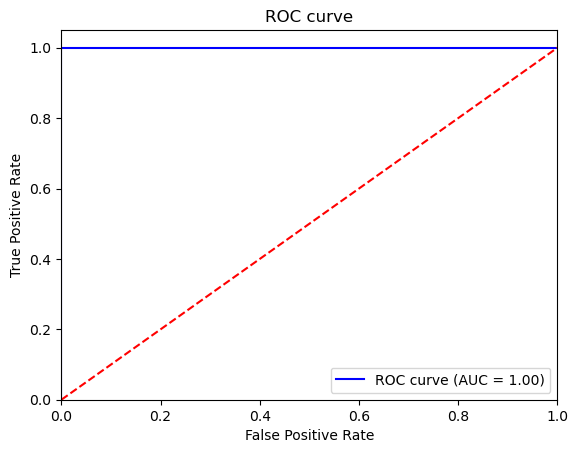

In [16]:
Logistic_roc_auc = roc_auc_score(y, Logistic_Regression_Model.predict(x))
fpr, tpr, thresholds = roc_curve(y, Logistic_Regression_Model.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr, tpr, 'b', label=f'ROC curve (AUC = {Logistic_roc_auc:.2f})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.savefig('ROC_curve.png')
plt.show()

# Accuracy & F1-Score

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [18]:
x_train.head()

,KısaVadeliYükümlülüklerToplamKaynaklar,ToplamYabanncıKaynaklarÖzkaynaklar,DuranVarlıklarVarlıkAktifToplamı,ÖzkaynakKarlılığı,DönenVarlıklarDevirHızı,ÖzkaynakDevirHızı,NÇDDH
5,0.69,3.43,0.43,0.48,3.06,7.68,-14.45
0,0.24,2.60,0.81,0.11,2.65,1.84,-10.61
8,0.38,1.20,0.60,0.35,3.89,3.40,70.67
2,0.37,2.88,0.71,0.34,2.88,3.28,-11.19
4,0.22,0.77,0.96,-0.04,4.20,0.29,-0.91


In [19]:
x_test.head()

,KısaVadeliYükümlülüklerToplamKaynaklar,ToplamYabanncıKaynaklarÖzkaynaklar,DuranVarlıklarVarlıkAktifToplamı,ÖzkaynakKarlılığı,DönenVarlıklarDevirHızı,ÖzkaynakDevirHızı,NÇDDH
7,0.25,0.50,0.30,0.56,0.62,0.65,0.98
1,0.23,2.94,0.71,0.25,1.81,2.06,8.33


In [20]:
y_train.head()

5    1
0    0
8    1
2    1
4    0
Name: BaşarıDurumu, dtype: int64

In [21]:
y_test.head()

7    1
1    1
Name: BaşarıDurumu, dtype: int64

In [22]:
Logistic_Regression_Model=LogisticRegression(solver="liblinear").fit(x_train,y_train)


In [23]:
y_pred=Logistic_Regression_Model.predict(x_test)

In [24]:
print(accuracy_score(y_test,y_pred))

1.0


In [25]:
print(mt.f1_score(y_test,y_pred))

1.0
